<a href="https://colab.research.google.com/github/i40-Tools/I40KG-Embeddings/blob/master/Community-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I40 standards landscape similarity analysis using embeddings

## Overview

In this notebook, we show the similarity analysis between Industry 4.0 Standards. 
To do so, we create embeddings about the Industry 4.0 Standards Knowledge Graph (I40KG) developed by [Grangel-Gonzales et. al.](https://www.researchgate.net/publication/318208930_The_Industry_40_Standards_Landscape_from_a_Semantic_Integration_Perspective)

The embeddings are located here: [I40 Embeddings](https://github.com/i40-Tools/I40KG-Embeddings/tree/master/logs_sto)

## Initial Configurations
First, let's import the required libraries to perform the similarity analysis.

In [0]:
!git clone https://github.com/i40-Tools/I40KG-Embeddings.git

Cloning into 'I40KG-Embeddings'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 122 (delta 60), reused 37 (delta 9), pack-reused 0
Receiving objects: 100% (122/122), 22.65 MiB | 23.67 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [0]:
%ls

I40KG-Embeddings/  sample_data/


In [28]:
import scipy
from scipy import spatial
import numpy as np
import math
import json
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

### Define function to print the result in tabular format 

In [3]:
#function to print result in table for similarity of frameworks
def print_result_framework(result):
    print ("{:<8}                                            {:<15}                         {:<10}".format('Framework A','Framework B','Score'))
    print ("----------------------------------------------------------------------------------------------------------------------")
    for key,value in result.items():
        val = str(value)
        val = val.strip("{}")
        val = val.strip("''")
        val = val.replace("':","     ")
        print("{:<8}       {:<15}".format(key +"      ", val))



In [4]:
#function to print result in table for similarity of standards, similarity of standards for same framework and different framework
def print_result_standard(result):
    print ("{:<8}                                            {:<15}                         {:<10}".format('Standard A','Standard B','Score'))
    print ("----------------------------------------------------------------------------------------------------------------------")
    for key,value in result.items():
        val = str(value)
        val = val.strip("{}")
        val = val.strip("''")
        val = val.replace("':","     ")
        print("{:<8}       {:<15}".format(key +"      ", val))



In [5]:
#function to print result in table for similarity for layers
def print_layers(result,framework1,framework2):
    print ("{:<8}                     {:<15}                         {:<10}".format(framework1,framework2,'Score'))
    print ("----------------------------------------------------------------------------------------------------------------------")
    for key,value in result.items():
        val = str(value)
        val = val.strip("{}")
        val = val.strip("''")
        val = val.replace("':","     ")
        print("{:<8}       {:<15}".format(key +"      ", val))


In [283]:
from rdflib import Graph,URIRef, tools
from gastrodon import LocalEndpoint,one,QName
g = Graph()
g.parse("sto/sto.nt", format="nt")

sto_endpoint=LocalEndpoint(g)

qres = sto_endpoint.select(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select distinct ?p where {
            ?s rdf:type sto:Standard .
            ?s ?p ?o.
    } """)
for i in range(qres.shape[0]):
    print(qres['p'][i])

59
https://w3id.org/i40/rami#Engineering
https://w3id.org/i40/rami#Lifecycle_Status
https://w3id.org/i40/rami#Station
https://w3id.org/i40/rami#Security
https://w3id.org/i40/rami#Product
https://w3id.org/i40/sto#ProductionSystemModelData
https://w3id.org/i40/sto#CrossLevel
http://example.org/iira#TansportLayer
http://example.org/iira#Privacy
https://w3id.org/i40/rami#Business
https://w3id.org/i40/rami#Asset
https://w3id.org/i40/sto#Safety
https://w3id.org/i40/rami#Safety
https://w3id.org/ids/ram/SystemLayer
https://w3id.org/i40/rami#Other
https://w3id.org/i40/sto#ProductLifeCycleManagement
https://w3id.org/i40/rami#FieldDevice
https://w3id.org/i40/sto#ModelingPractice
https://w3id.org/ids/ram/Certification
http://example.org/iira#Safety
https://w3id.org/ids/ram/Security
https://w3id.org/i40/rami#ControlDevice
https://w3id.org/i40/sto#DataSovereignty
https://w3id.org/i40/rami#ConnectedWorld
http://example.org/iira#Security
https://w3id.org/i40/sto#ProductModelDataExchange
https://w3id.o

##Similarity among Standards of the same Framework
In this section we show the analysis of similarity among standards belonging to the same framework.

In [463]:
import json
from rdflib import Graph
import pprint
import numpy as np
SIMETRIC_MATRIX_FILE = "simetric_matrix.tsv"
ENTITIES_FILE = "entities.txt"
list_sim = []


g = Graph()
g.parse("sto/sto.nt", format="nt")
    
len(g) # prints 2
    
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?s where {
            ?s rdf:type sto:Standard .
    } limit 1000""")

        
with open("embeddings/TransE/entities_to_embeddings.json",'rb') as f:
    array = json.load(f)
new_dict = {}
for row in qres:
    for key,value in array.items():
        if key == "%s" % row:
            tem = key
            #print(key)
            new_dict[tem] = array[key] 


with open('output_standard_same_framework.json','w') as f:
    # this would place the entire output on one line
    # use json.dump(lista_items, f, indent=4) to "pretty-print" with four spaces per indent
    json.dump(new_dict, f) 

    
#to read the file containing standards/frameworks along with their embeddings   
with open('output_standard_same_framework.json', 'r') as f:
    array = json.load(f)


list_n = [*array]
entities = "\n".join(str(x) for x in list_n)
n_ent = str(len(list_n))
with open(ENTITIES_FILE, "w") as entity:
    entity.write(n_ent+"\n"+entities)

#print(len([*array]))
#compare each standard/framework with all the other standards/frameworks to find cosine similarity
result = {}
s=n_ent+"\n"
with open(SIMETRIC_MATRIX_FILE, "w") as fs:
    for key,value in array.items():
        for keyC,valueC in array.items():
            #print(value)
            #sim = cosine_similarity([value,valueC])[0][1] #send the values of the standards/frameworks to cosine similarity function
            sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
            s += str(sim) + " "
            list_sim.append(sim)
        s = s.rstrip(" ")
        fs.write(s + "\n")
        s = ""

print("percentil", np.percentile(list_sim, 95))

percentil 0.281098171936


In [196]:
features = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select distinct ?o2 where {
            <https://w3id.org/i40/sto#DIN_EN_50155> sto:hasDomain ?o .
            ?o ?p ?o2
    } limit 1000""")

n_dict = {}
for row in features:
    print(row)

In [464]:
import pandas as pd
input_path = "Cluster-semep/"
cls_0 = input_path + "cluster-0.txt"
cls_1 = input_path + "cluster-1.txt"
cls_2 = input_path + "cluster-2.txt"
cluster_0 = pd.read_csv(cls_0, delimiter=",", header=None)
cluster_1 =pd.read_csv(cls_1, delimiter=",", header=None)
cluster_2 =pd.read_csv(cls_2, delimiter=",", header=None)
pop_stand =pd.read_csv('entities.txt', delimiter=",", header=None)

In [467]:
cluster_2.shape

(100, 1)

### Features to analyse on the clusters

In [534]:
feature_dict = {}
data = [cluster_0, cluster_1, cluster_2, pop_stand]
for f in range(len(data)):
    if f == (len(data) - 1):
        key_1 = 'pop_stand'
    else:
        key_1 = 'cluster-'+str(f)
    feature_dict[key_1] = {}
    for i in range(data[f].shape[0]):
        features = g.query(
        """PREFIX owl: <http://www.w3.org/2002/07/owl#>
           PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
           PREFIX sto: <https://w3id.org/i40/sto#>
    
        select distinct ?o where {
                <""" +data[f][0][i]+ """> sto:hasPages ?o .
        }""")
        #feature_dict[key_1][data[f][0][i]] = {}
        #if len(features) == 0:
        #    feature_dict[key_1][data[f][0][i]] = 0
        #    continue
        for row in features:
            if row not in feature_dict[key_1].keys():
                feature_dict[key_1][row] = 0
                feature_dict[key_1][row] += 1
            else:
                feature_dict[key_1][row] += 1

In [535]:
(feature_dict['cluster-1'].values())

dict_values([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Fill with zero the features missing in the cluster

In [536]:
for cls in feature_dict:
    diff = set(feature_dict['pop_stand'].keys()) - set(feature_dict[cls].keys())
    if len(diff) == 0:
        continue
    for feature in diff:
        feature_dict[cls][feature] = 0
#set(feature_dict['cluster-0']).intersection(set(feature_dict['pop_stand'].keys()))

In [537]:
(feature_dict['cluster-0'].keys())

dict_keys([(rdflib.term.Literal('111', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('109', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('33', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('176', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('103', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('43', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('45', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('25', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('9', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('310', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')

In [538]:
len(feature_dict['pop_stand'].keys())

55

In [539]:
(feature_dict['pop_stand'].keys())

dict_keys([(rdflib.term.Literal('83', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('111', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('93', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('23', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('49', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('65', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('43', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('45', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('29', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),), (rdflib.term.Literal('13', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')),)

In [540]:
feature_dict.keys()

dict_keys(['cluster-0', 'cluster-1', 'cluster-2', 'pop_stand'])

### Normalization clusters and pop_stand

In [541]:
for key, value in feature_dict['pop_stand'].items():
    print('cluster-0', feature_dict['cluster-0'][key])
    print('cluster-1', feature_dict['cluster-1'][key])
    print('cluster-2', feature_dict['cluster-2'][key])
    print('pop_stand', feature_dict['pop_stand'][key])
    feature_dict['cluster-0'][key] = feature_dict['cluster-0'][key]/feature_dict['pop_stand'][key]
    feature_dict['cluster-1'][key] = feature_dict['cluster-1'][key]/feature_dict['pop_stand'][key]
    feature_dict['cluster-2'][key] = feature_dict['cluster-2'][key]/feature_dict['pop_stand'][key]
    feature_dict['pop_stand'][key] = feature_dict['pop_stand'][key]/feature_dict['pop_stand'][key]
    print('Normalization cluster-0', feature_dict['cluster-0'][key])
    print('Normalization cluster-1', feature_dict['cluster-1'][key])
    print('Normalization cluster-2', feature_dict['cluster-2'][key])

cluster-0 0
cluster-1 0
cluster-2 1
pop_stand 1
Normalization cluster-0 0.0
Normalization cluster-1 0.0
Normalization cluster-2 1.0
cluster-0 1
cluster-1 0
cluster-2 0
pop_stand 1
Normalization cluster-0 1.0
Normalization cluster-1 0.0
Normalization cluster-2 0.0
cluster-0 0
cluster-1 0
cluster-2 2
pop_stand 2
Normalization cluster-0 0.0
Normalization cluster-1 0.0
Normalization cluster-2 1.0
cluster-0 0
cluster-1 0
cluster-2 1
pop_stand 1
Normalization cluster-0 0.0
Normalization cluster-1 0.0
Normalization cluster-2 1.0
cluster-0 0
cluster-1 0
cluster-2 1
pop_stand 1
Normalization cluster-0 0.0
Normalization cluster-1 0.0
Normalization cluster-2 1.0
cluster-0 0
cluster-1 0
cluster-2 1
pop_stand 1
Normalization cluster-0 0.0
Normalization cluster-1 0.0
Normalization cluster-2 1.0
cluster-0 3
cluster-1 0
cluster-2 2
pop_stand 5
Normalization cluster-0 0.6
Normalization cluster-1 0.0
Normalization cluster-2 0.4
cluster-0 1
cluster-1 0
cluster-2 0
pop_stand 1
Normalization cluster-0 1.0


In [542]:
to_plot = 'plot_std.csv'
cluster = feature_dict.keys()
keys = (feature_dict['pop_stand'].keys())
copy_keys = list(feature_dict['pop_stand'].keys())
for l in range(len(copy_keys)):
    temp = str(copy_keys[l]).split('#')
    if len(temp)==2:
        copy_keys[l] = temp[1]
    elif str(copy_keys[l]).startswith("(rdflib.term.Literal("):
        #copy_keys[l] = str(copy_keys[l]).split("(rdflib.term.Literal(")[1]
        new_set = str(copy_keys[l]).replace("(rdflib.term.Literal(", '').replace(", datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')", '')
        copy_keys[l] = new_set        
    elif str(copy_keys[l]).startswith("(rdflib.term.URIRef('http://lexvo.org/id/iso639-3/"):
        copy_keys[l] = str(copy_keys[l]).split("(rdflib.term.URIRef('http://lexvo.org/id/iso639-3/")[1]
    else:
        copy_keys[l] = str(copy_keys[l]).split("(rdflib.term.URIRef('https://w3id.org/ids/ram/")[1]
header = "\t".join(str(x) for x in copy_keys)

l_value = 'Comparision\t' + header + "\n"
#print(l_value)

array = []
temp = []
with open(to_plot, "w") as plot:
    plot.write(l_value)
    for key in cluster:
        l_value = key + "\t"
        for key_2 in keys:
            value = feature_dict[key][key_2]
            l_value += str(value) + "\t"
            temp.append(value)
        l_value = l_value.rstrip("\t")
        plot.write(l_value + "\n")
        print(l_value)
        l_value = ""
        array.append(temp)
        temp = []
        

cluster-0	0.0	1.0	0.0	0.0	0.0	0.0	0.6	1.0	0.0	0.0	0.2	1.0	0.0	0.0	0.0	0.0	1.0	0.0	1.0	1.0	0.0	1.0	1.0	0.0	0.5	1.0	0.0	0.5	1.0	0.5	0.0	0.5	0.5	0.0	0.5	0.0	1.0	1.0	0.0	0.0	0.0	0.0	1.0	0.5	0.0	1.0	0.5	0.0	1.0	0.0	1.0	0.0	0.0	0.0	0.0
cluster-1	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.2	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	1.0	0.5	0.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	1.0	0.0	1.0	1.0	0.0	0.5	0.0	0.0	0.0	1.0	0.0	0.5	0.0	0.0	1.0	0.0	1.0
cluster-2	1.0	0.0	1.0	1.0	1.0	1.0	0.4	0.0	0.0	1.0	0.6	0.0	0.0	1.0	1.0	1.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.5	0.0	0.5	0.0	0.5	0.5	0.0	0.5	1.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	1.0	0.0	0.5	0.0	0.0	0.5	0.0	1.0	0.0	1.0	0.0
pop_stand	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0


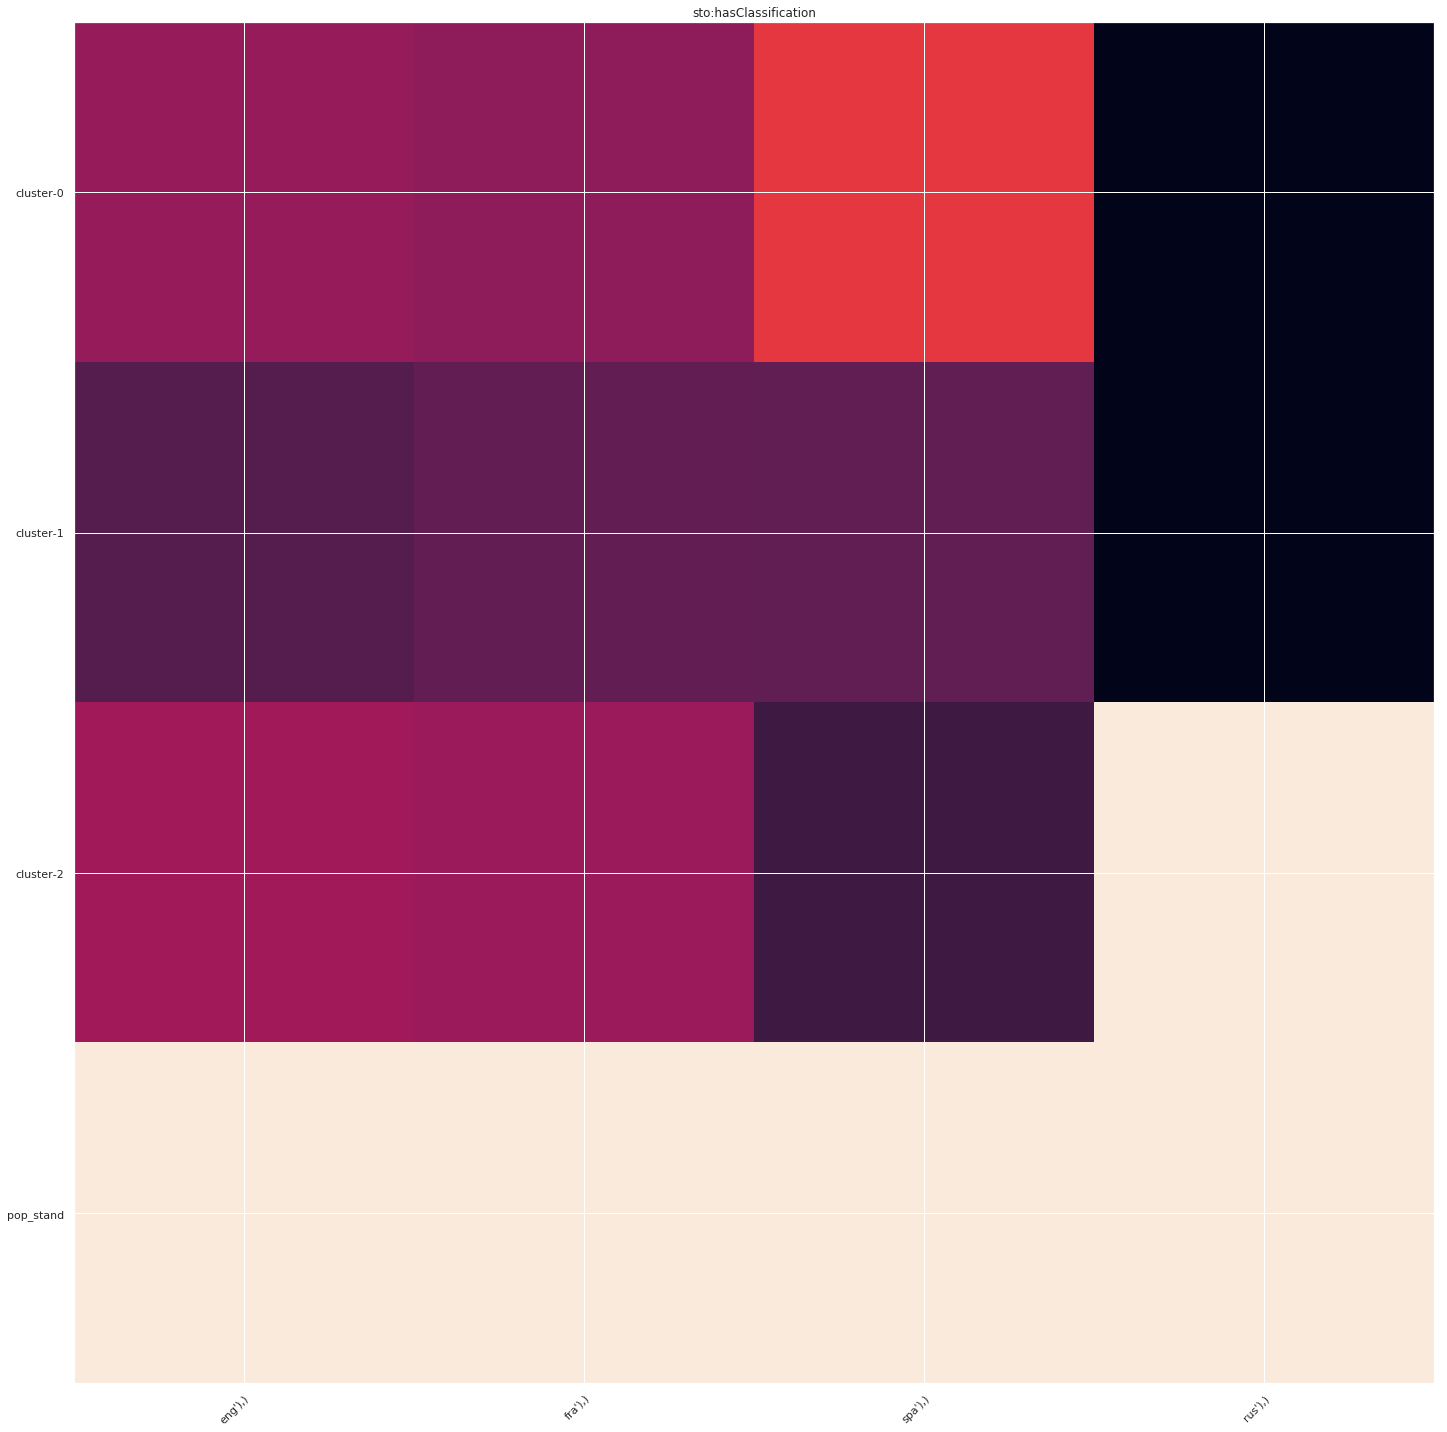

<Figure size 1440x1440 with 0 Axes>

In [533]:
import numpy as np
import matplotlib
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
# sphinx_gallery_thumbnail_number = 2
plt.rcParams["figure.figsize"] = (20,20)

vegetables = cluster
farmers = copy_keys

harvest = np.array(array)


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
#    for j in range(len(farmers)):
#        text = ax.text(j, i, harvest[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("sto:hasClassification")
fig.tight_layout()
plt.show()

plt.savefig('foo.pdf', bbox_inches='tight')

In [399]:
harvest[0]

array([ 0.8,  2.4,  2.5,  3.9,  0. ,  4. ,  0. ])

## K-means Analyse 

In [76]:
vectors = []
for key,value in array.items():
    vectors.append(value)
X = np.array(vectors)
#type(array.values())

In [77]:
X[0]

array([-0.22203507, -0.19076811, -0.03599098, -0.22113626, -0.06112197,
       -0.09213533,  0.18401752, -0.14221205, -0.17487825, -0.00322263,
        0.10758843,  0.02991104,  0.19961376,  0.10379973, -0.19424342,
       -0.23053822, -0.01838547, -0.03145621,  0.10242991,  0.02212641,
        0.01365444, -0.07948184, -0.19251002, -0.0869351 , -0.10804311,
       -0.21609512, -0.09473796,  0.18659686, -0.1149053 ,  0.01929609,
        0.11690716,  0.03057409,  0.08061689,  0.08604708,  0.19714922,
       -0.23031537, -0.20890269, -0.03666067, -0.09295762, -0.07844608,
       -0.08766536, -0.23858877,  0.24791397, -0.16641128,  0.03277154,
        0.18086411,  0.05698955, -0.03824593,  0.16114292,  0.18879515])

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy

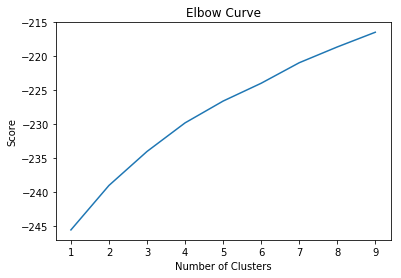

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

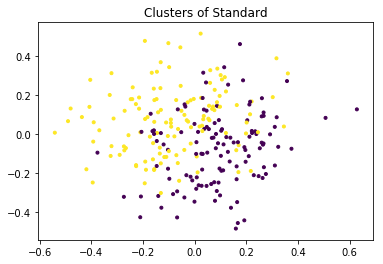

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_c = pca.transform(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans
plt.scatter(pca_c[:, 0], pca_c[:, 1], c=kmeans.labels_, marker='.')
plt.title("Clusters of Standard")
plt.show()

### Number of standard by clsuter

In [80]:
import pandas as pd
pd.value_counts(kmeans.labels_, 0)

0    123
1    127
dtype: int64

### Similarity intra-cluster

In [81]:
label = pd.DataFrame(kmeans.labels_)
for k in range(2):
    index_a = label.index[label[0] == k].tolist()
    sim = cosine_similarity(X[index_a], X[index_a])[0][1]
    print(len(index_a))
    print(sim)

123
-0.279977997439
127
0.0434625394583


In [82]:
label.index[label[0] == 0]

Int64Index([  6,  11,  13,  19,  20,  21,  22,  25,  26,  28,
            ...
            224, 228, 230, 232, 234, 235, 236, 238, 242, 248],
           dtype='int64', length=123)